In [1]:
import pandas as pd
f=open("microarray/GPL2895.annot")
data= f.readlines()
f.close()

In [2]:
df=[]
counter=0
for d in data:
    if d[0]!="#" and d[0]!='!' and d[0]!="^":
        line = d.split("\t")
        temp=[]

        for c in line:
            if c:
                temp.append(c)
        if 'protein' in temp[1]:
            df.append({"ID":temp[0], "Gene title":temp[1], "Gene ID":temp[2]})
                
                

In [3]:
data=pd.DataFrame(df)

In [4]:
data

ID                                         Gene title    Gene ID
0       1023               influenza virus NS1A binding protein   IVNS1ABP
1       1032                   endoplasmic reticulum protein 44      ERP44
2       1040                       meiosis 1 associated protein       M1AP
3       1056                          calcium binding protein 4      CABP4
4       1091        long intergenic non-protein coding RNA 1168  LINC01168
...      ...                                                ...        ...
6159  504053                            zinc finger protein 660     ZNF660
6160  504071        long intergenic non-protein coding RNA 1019  LINC01019
6161  504072  RNA binding motif protein, Y-linked, family 3,...    RBMY3AP
6162  504086                  GRB2 associated binding protein 1       GAB1
6163  504095  Homo sapiens integral nuclear envelope inner m...     439431

[6164 rows x 3 columns]

In [5]:
expr=pd.read_csv("GSE33133/modified_data.txt",sep="\t")
expr=expr[expr["ID_REF"].isin(data["ID"])]
expression=expr.drop(['ID_REF'], axis=1)
expression

GSM813064  GSM813065  GSM813066  GSM813067  GSM814496  GSM814497
22        1.0246     1.1853     1.0405     0.6051     0.2214     1.1343
29       69.3001    62.1455    59.5972    50.9925    62.0970    55.2177
37        0.3716     0.6244     1.0575     0.7659     0.6872     0.5908
52        0.2822     0.2681     0.2703     0.3620     0.1755     0.2477
86        0.6608     0.1859     0.5080     0.1325     0.4086     0.5661
...          ...        ...        ...        ...        ...        ...
54328     0.3578     0.3171     0.1769     0.8051     0.4173     0.8153
54337     0.3216     0.2369     0.2477     0.0701     0.6049     0.3036
54338     0.6290     1.0435     0.5294     0.6104     0.7616     0.8871
54345     0.6138     0.7505     0.5484     0.2496     1.3162     0.4789
54350     4.1565     4.1659     3.8018     3.9252     3.9875     4.2870

[6164 rows x 6 columns]

In [6]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
norm_expression = scaler.fit_transform(expression)

In [7]:
pd.DataFrame(norm_expression)

0         1         2         3         4         5
0     0.055575  0.056558  0.058670  0.055305  0.055805  0.058309
1     0.146068  0.137384  0.135254  0.123092  0.137851  0.129038
2     0.054710  0.055814  0.058692  0.055521  0.056423  0.057599
3     0.054591  0.055342  0.057663  0.054978  0.055744  0.057150
4     0.055093  0.055233  0.057974  0.054669  0.056053  0.057566
...        ...       ...       ...       ...       ...       ...
6159  0.054691  0.055407  0.057541  0.055574  0.056065  0.057892
6160  0.054643  0.055300  0.057633  0.054585  0.056314  0.057223
6161  0.055051  0.056370  0.058002  0.055312  0.056521  0.057986
6162  0.055031  0.055981  0.058026  0.054827  0.057257  0.057452
6163  0.059726  0.060510  0.062281  0.059771  0.060799  0.062432

[6164 rows x 6 columns]

## kmeans clustering

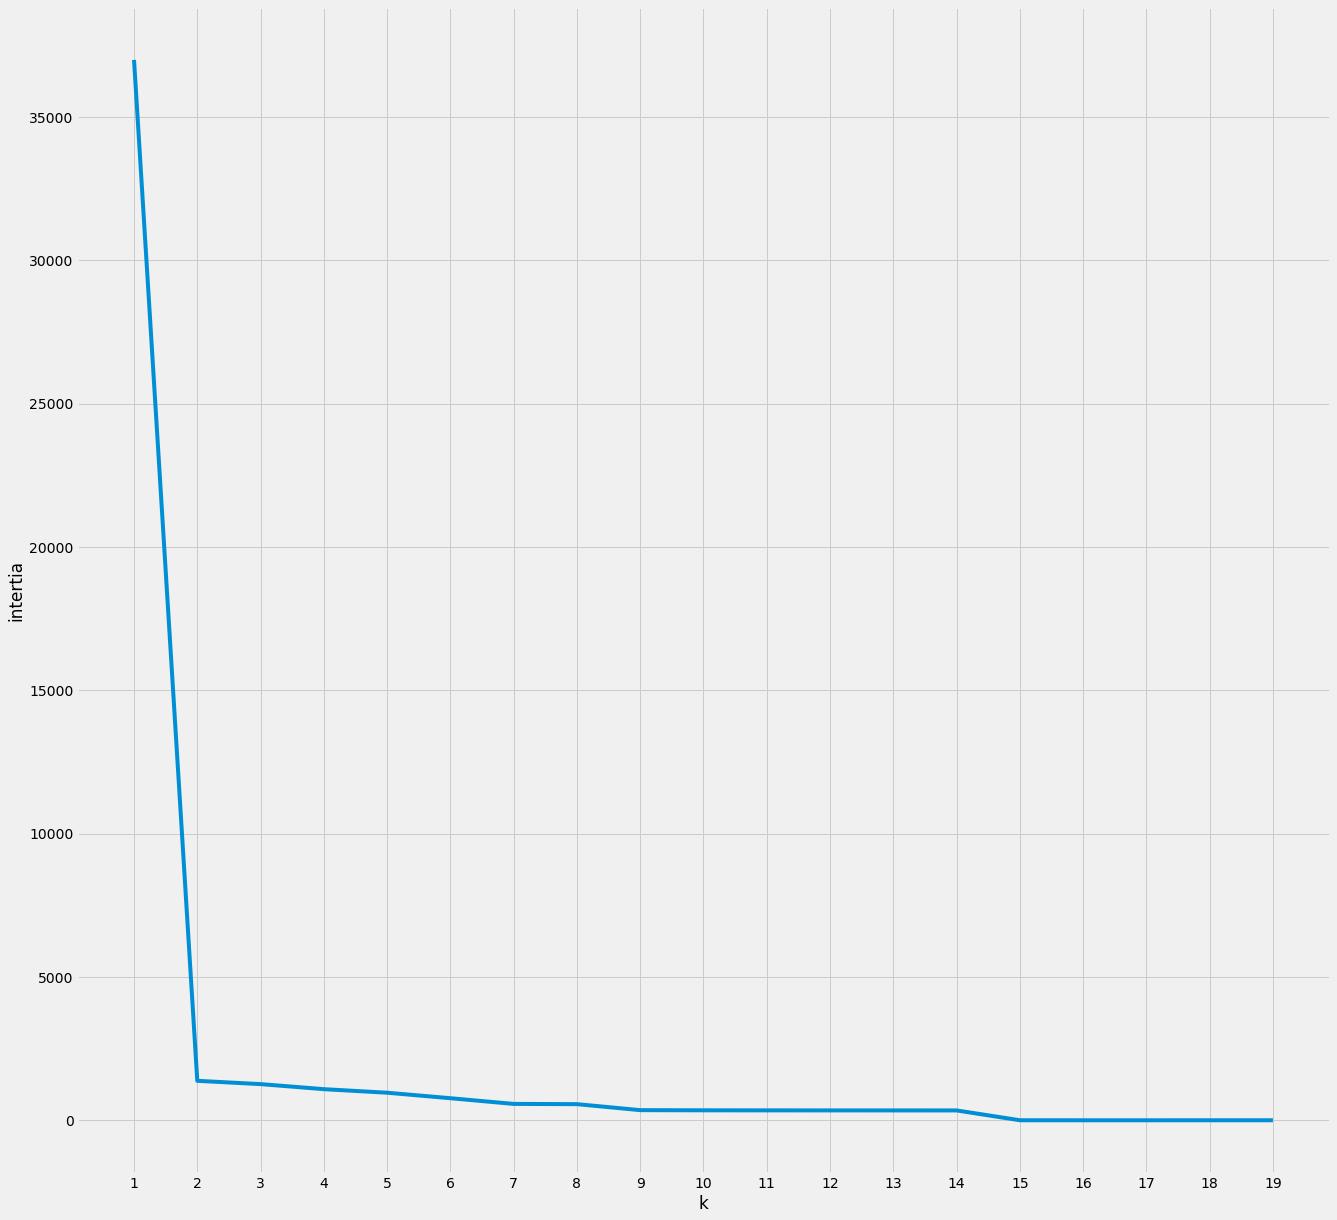

In [191]:
inertias=[]
plt.figure(figsize=(20,20))
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(norm_expression)
    inertias.append(kmeans.inertia_)
plt.plot(range(1, 20), inertias)
plt.xticks(range(1,20))
plt.xlabel('k')
plt.ylabel('intertia')
plt.show()

<Figure size 1440x1440 with 0 Axes>

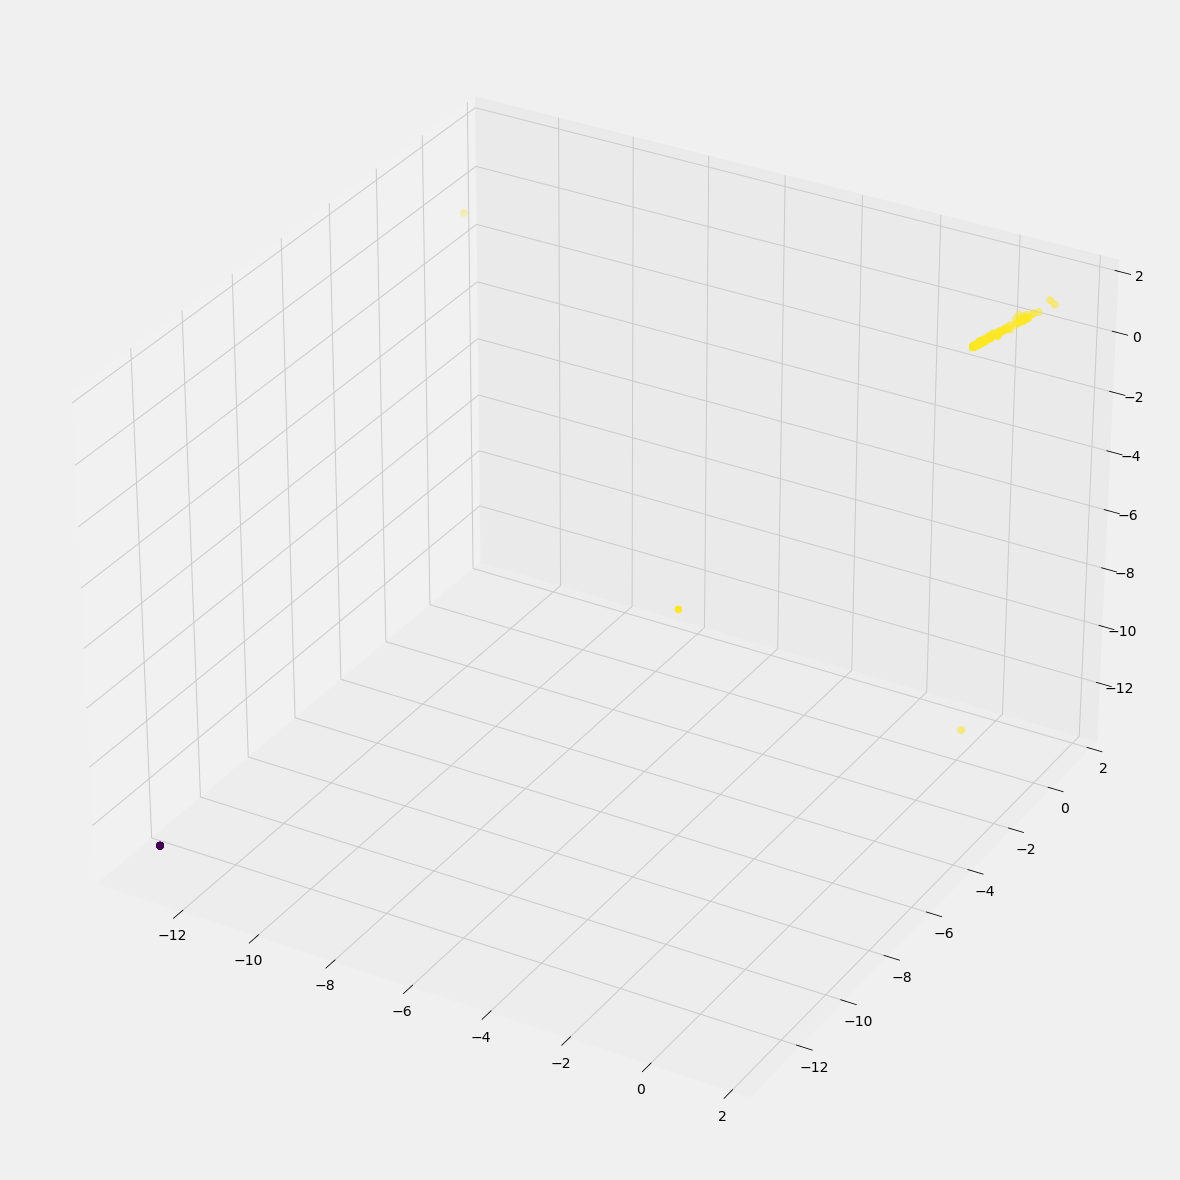

In [217]:
plt.figure(figsize=(20,20))
from mpl_toolkits import mplot3d
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, n_init=10, random_state=0)
kmeans.fit(norm_expression)
y_kmeans = kmeans.predict(norm_expression)
fig = plt.figure(figsize = (20, 20))
ax = plt.axes(projection ="3d")
ax.scatter3D(norm_expression[:, 0], norm_expression[:, 1], norm_expression[:,2], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
#ax.scatter(centers[:, 0], centers[:, 1], c='black', s=0, alpha=0.5);

In [218]:
sum(y_kmeans==1)



6130

In [219]:
sum(y_kmeans==0)



34

In [224]:
expression.to_csv("subset_data.txt", sep="\t")

In [222]:
expression

GSM813064  GSM813065  GSM813066  GSM813067  GSM814496  GSM814497
22        1.0246     1.1853     1.0405     0.6051     0.2214     1.1343
29       69.3001    62.1455    59.5972    50.9925    62.0970    55.2177
37        0.3716     0.6244     1.0575     0.7659     0.6872     0.5908
52        0.2822     0.2681     0.2703     0.3620     0.1755     0.2477
86        0.6608     0.1859     0.5080     0.1325     0.4086     0.5661
...          ...        ...        ...        ...        ...        ...
54328     0.3578     0.3171     0.1769     0.8051     0.4173     0.8153
54337     0.3216     0.2369     0.2477     0.0701     0.6049     0.3036
54338     0.6290     1.0435     0.5294     0.6104     0.7616     0.8871
54345     0.6138     0.7505     0.5484     0.2496     1.3162     0.4789
54350     4.1565     4.1659     3.8018     3.9252     3.9875     4.2870

[6164 rows x 6 columns]

In [8]:
import numpy as np
import pandas as pd
from clustergrammer2 import net, Network, CGM2
import warnings
warnings.filterwarnings('ignore')
net.load_df(expression)
net.widget()

>> clustergrammer2 backend version 0.17.0


CGM2(network='{"row_nodes": [{"name": 22, "ini": 6164, "clust": 1083, "rank": 1820, "rankvar": 3176}, {"name":…

In [9]:
net.load_df(expression)
# cluster using default parameters
net.cluster(enrichrgram=True)
# make interactive widget
net.widget()

CGM2(network='{"row_nodes": [{"name": 22, "ini": 6164, "clust": 1083, "rank": 1820, "rankvar": 3176}, {"name":…